# Minimum Variance Beamformer

参考论文：https://www.researchgate.net/publication/6135459_Adaptive_Beamforming_Applied_to_Medical_Ultrasound_Imaging

### 1. 生成钟组随机数据

##### (1) 基础仿真数据的生成

$ y(t)=[a + \epsilon{_1} * GN{_1}(\mu_1,\sigma_1)] + [b + \epsilon{_2} * GN{_2}(\mu_2,\sigma_2)] * t $

$ GN_{1} $ 代表钟在频率a上的噪声，$ GN_{2} $ 代表钟在频率漂移b上的噪声

$ a = μ_1 = μ_2 = 0, b = 10^{-15}, σ_1 = 2 × 10^{-30}, σ_2 = 10^{-34}, t = 1, 2, 3... $

In [1]:
a = 0
b = 10 ** (-15)
epsilon_1 = 1.0
epsilon_2 = 0.1
mu_1 = 0
mu_2 = 0
sigma_1 = 2 * 10 ** (-30)
sigma_2 = 10 ** (-34)

t = range(1,11) # 1,2,3...10
clock_size = 5

In [2]:
import math
import numpy as np
frequency = a + epsilon_1 * np.random.normal(loc=mu_1, scale=math.sqrt(sigma_1), size=(len(t), clock_size))
frequency_drift = b + epsilon_2 * np.random.normal(loc=mu_2, scale=math.sqrt(sigma_2), size=(len(t), clock_size))

In [3]:
y_t = frequency + np.array(t).reshape((-1,1)) * frequency_drift
print(y_t)

[[2.39768254e-16 9.06622534e-16 1.59934429e-15 1.69990045e-15
  3.34501998e-15]
 [2.15624913e-15 2.94595703e-15 1.58654008e-15 9.25438832e-16
  2.92480054e-15]
 [1.21680714e-15 1.75519783e-15 3.65583281e-15 3.37403494e-15
  4.94784233e-15]
 [3.77928808e-15 3.36861180e-15 5.17026879e-15 2.54840145e-15
  3.07037382e-15]
 [4.61634035e-15 2.76526604e-15 3.36816780e-15 4.68986554e-15
  4.19132851e-15]
 [6.49501528e-15 4.57414243e-15 6.48180075e-15 6.59054860e-15
  6.69998680e-15]
 [7.93207085e-15 5.04336607e-15 6.17190742e-15 5.27111635e-15
  5.46911074e-15]
 [9.56129512e-15 6.99916688e-15 8.81164214e-15 8.79218021e-15
  8.94394607e-15]
 [8.12014284e-15 9.70316659e-15 9.93623809e-15 8.13835282e-15
  1.03860942e-14]
 [7.74987152e-15 1.07800858e-14 9.39733565e-15 1.04414437e-14
  9.74765265e-15]]


##### (2) 添加相关性扰动

$ y_{i}(t) = y_{i}(t) + \beta GN_{s}, -1 < \beta < 1 $

$ GN_{s} $ 代表环境产生的噪声。β表示相关性的大小，用它来控制钟之间的相关性

In [4]:
beta_range = 1.0
mu_s = 0
sigma_s = 10 ** (-30)

beta = np.random.uniform(-beta_range, beta_range, clock_size)
noice_global = np.random.normal(loc=mu_s, scale=math.sqrt(sigma_s), size=(len(t), 1))

print(beta)
print(noice_global)

[-0.14980243  0.09023144  0.43006032  0.64739913 -0.32889937]
[[ 2.41143416e-16]
 [-4.56795745e-16]
 [ 5.99569138e-16]
 [ 7.16366835e-16]
 [-7.02971050e-16]
 [ 3.15262273e-16]
 [-1.10788497e-15]
 [ 8.49623073e-16]
 [-3.91744248e-17]
 [ 2.81149128e-16]]


In [5]:
y_t = y_t + noice_global * beta
print(y_t)

[[2.03644384e-16 9.28381251e-16 1.70305050e-15 1.85601649e-15
  3.26570807e-15]
 [2.22467824e-15 2.90473969e-15 1.39009035e-15 6.29709664e-16
  3.07504038e-15]
 [1.12699023e-15 1.80929781e-15 3.91368371e-15 3.76219548e-15
  4.75064441e-15]
 [3.67197459e-15 3.43325061e-15 5.47834975e-15 3.01217672e-15
  2.83476122e-15]
 [4.72164712e-15 2.70183595e-15 3.06584784e-15 4.23476269e-15
  4.42253524e-15]
 [6.44778823e-15 4.60258900e-15 6.61738255e-15 6.79464912e-15
  6.59629723e-15]
 [8.09803471e-15 4.94340001e-15 5.69545005e-15 4.55387259e-15
  5.83349341e-15]
 [9.43401952e-15 7.07582959e-15 9.17703132e-15 9.34222545e-15
  8.66450557e-15]
 [8.12601127e-15 9.69963182e-15 9.91939072e-15 8.11299133e-15
  1.03989786e-14]
 [7.70775470e-15 1.08054543e-14 9.51824673e-15 1.06234594e-14
  9.65518288e-15]]


##### (3) 可视化各台钟的数据

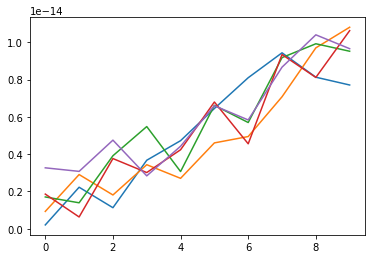

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(facecolor='white')
plt.plot(y_t)
plt.show()

### 2. 安装Allan Variance组件包

In [7]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


### 3. 生成子钟组

In [8]:
subset_size = 3
subsets = list()
if subset_size > y_t.shape[1]:
    raise Exception('The subset size should not be greater than the number of clocks')
for i in range(y_t.shape[1] - subset_size + 1):
    subset = y_t[:,i:i+subset_size]
    subsets.append(subset)
print(subsets)

[array([[2.03644384e-16, 9.28381251e-16, 1.70305050e-15],
       [2.22467824e-15, 2.90473969e-15, 1.39009035e-15],
       [1.12699023e-15, 1.80929781e-15, 3.91368371e-15],
       [3.67197459e-15, 3.43325061e-15, 5.47834975e-15],
       [4.72164712e-15, 2.70183595e-15, 3.06584784e-15],
       [6.44778823e-15, 4.60258900e-15, 6.61738255e-15],
       [8.09803471e-15, 4.94340001e-15, 5.69545005e-15],
       [9.43401952e-15, 7.07582959e-15, 9.17703132e-15],
       [8.12601127e-15, 9.69963182e-15, 9.91939072e-15],
       [7.70775470e-15, 1.08054543e-14, 9.51824673e-15]]), array([[9.28381251e-16, 1.70305050e-15, 1.85601649e-15],
       [2.90473969e-15, 1.39009035e-15, 6.29709664e-16],
       [1.80929781e-15, 3.91368371e-15, 3.76219548e-15],
       [3.43325061e-15, 5.47834975e-15, 3.01217672e-15],
       [2.70183595e-15, 3.06584784e-15, 4.23476269e-15],
       [4.60258900e-15, 6.61738255e-15, 6.79464912e-15],
       [4.94340001e-15, 5.69545005e-15, 4.55387259e-15],
       [7.07582959e-15, 9.17

### 4. 在滑动窗口内计算协方差矩阵，并计算各子钟组权重

------------------Step 0------------------
*** Raw sum ***
[2.83507614e-15 6.51950829e-15 6.84997175e-15 1.25835749e-14
 1.04893309e-14]
*** Raw sum ***
[4.48744824e-15 4.92453971e-15 9.48517701e-15 1.19237771e-14
 1.00024465e-14]
*** Raw sum ***
[6.82477506e-15 5.09484039e-15 1.24265236e-14 1.13252877e-14
 1.17231458e-14]
*** Cov mean ***
[[4.77436455e-30 3.67299370e-30 2.57156699e-30]
 [3.67299370e-30 3.60603761e-30 3.24352325e-30]
 [2.57156699e-30 3.24352325e-30 3.61655244e-30]]
*** Regularization term ***
[[9.5487291e-32 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 9.5487291e-32 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 9.5487291e-32]]
*** Inverse Cov mean ***
[[ 1.34410032e+30 -2.20972953e+30  9.99683562e+29]
 [-2.20972953e+30  4.78573410e+30 -2.65088012e+30]
 [ 9.99683562e+29 -2.65088012e+30  1.89314731e+30]]
*** Weight ***
[[ 0.44517166]
 [-0.24864893]
 [ 0.80347727]]
*** Weighted output ***
[1.87661599e-15 1.92380242e-15 3.55845448e-15 3.91220926e-15
 3.86724547e-15]
-------

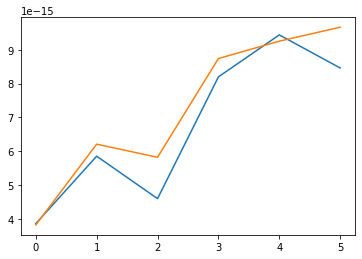

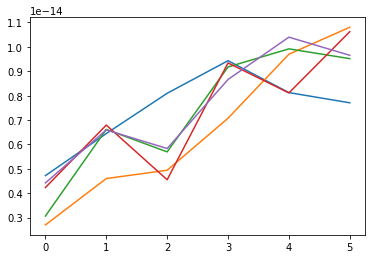

*** Weighted clock's Allan Variance ***
taus - [1.], adevs - [2.35611353e-15]
*** Mean clock's Allan Variance ***
taus - [1.], adevs - [1.74428508e-15]
*** Each clock's Allan Variance ***
taus - [1.], adevs - [9.92904688e-16]
taus - [1.], adevs - [1.01174514e-15]
taus - [1.], adevs - [2.45493836e-15]
taus - [1.], adevs - [3.91554195e-15]
taus - [1.], adevs - [1.9001035e-15]


In [9]:
regularization = True
window_size = 5
window_step = 1
A = np.ones((clock_size - subset_size + 1, 1))

if window_size > y_t.shape[0]:
    raise Exception('The window size should not be greater than the number of time points')

    
weighted_clock_estimation = []
for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
    subset_raw_sum_list = list()
    print("------------------Step %s------------------" % i)
    for j in range(len(subsets)):
        # 1. Get raw subset
        subset_raw = subsets[j][i:i+window_size,]
        
        # 2. Calculate summation within a subset 
        subset_raw_sum = np.sum(subset_raw, axis=1)
        subset_raw_sum_list.append(subset_raw_sum)
        print("*** Raw sum ***")
        print(subset_raw_sum)
   
    # 3. Calculate covariance matrix mean (Element-wise)
    print("*** Cov mean ***")
    allset_cov_mean = np.cov(np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1)
    print(allset_cov_mean)
    
    # 4. Add regularization term
    if regularization:
        print("*** Regularization term ***")
        sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
        print(sigma * np.eye(clock_size - subset_size + 1))
        allset_cov_mean += sigma * np.eye(clock_size - subset_size + 1)
    
    
    # 5. Calculate the inverse of covariance matrix mean
    print("*** Inverse Cov mean ***")
    allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
    print(allset_cov_mean_inverse)
    
    # 6. Calculate weight
    print("*** Weight ***")
    weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
    print(weight)

    # 7. Calculate weighted clock
    print("*** Weighted output ***")
    Z = (np.dot(weight.T, np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1))[0]
    print(Z)
    
    # 8. Select the last element in Z as the estimation of weighted clock
    weighted_clock_estimation.append(Z[-1])
    
# 9. Visualize weighted clock estimation and each clock
print("------------------Overall------------------")
print("*** Weighted clock estimation ***")
print(weighted_clock_estimation)

real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
real_clock_mean = np.mean(real_clock, axis=1)
print("*** Mean clock estimation ***")
print(real_clock_mean)

print("*** Clock covariance matrix ***")
print(np.cov(real_clock.T))

fig = plt.figure(facecolor='white')
plt.plot(weighted_clock_estimation)
plt.plot(real_clock_mean)
plt.show()

fig = plt.figure(facecolor='white')
plt.plot(real_clock)
plt.show()

# 10. Calculate Allan variance
print("*** Weighted clock's Allan Variance ***")
(taus, adevs, errors, ns) = allantools.adev(weighted_clock_estimation)
print('taus - %s, adevs - %s' % (taus, adevs))

print("*** Mean clock's Allan Variance ***")
(taus, adevs, errors, ns) = allantools.adev(real_clock_mean)
print('taus - %s, adevs - %s' % (taus, adevs))

print("*** Each clock's Allan Variance ***")
for i in range(real_clock.shape[1]):
    (taus, adevs, errors, ns) = allantools.adev(real_clock[:,i])
    print('taus - %s, adevs - %s' % (taus, adevs))

### 计算R(n)的估计
$ \hat{R}(n)=\frac{1}{(2K+1)(M-L+1)}\sum_{k=-K}^K\sum_{l=0}^{M-L}\bar{X_l}(n-k)\bar{X_l}(n-k)^{H} $